# IMDB Dataset - Sentiment Analysis.

Implement different feature engineering techniques:

    1. Count Vectorizer
    2. Count Vectorizer - Binary = True
    3. Count Vectorizer - n-gram range (1,2)
    4. Count Vectorizer - n-gram range (1,3)
    5. Count Vectorizer - n-gram range (2,3)
    6. Tf-idf Vectorizer
    7. Tf-idf Vectorizer - n-gram range (1,2)
    8. Tf-idf Vectorizer - n-gram range (1,3)
    9. Tf-idf Vectorizer - n-gram range (2,3)
   10.  Word2Vec




## Importing Namespaces

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import string
import nltk
from sklearn.svm import LinearSVC

from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\srivi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import numpy as np

## Load the imdb Dataset

In [3]:
df = pd.read_csv('IMDB Dataset.csv')

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [7]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

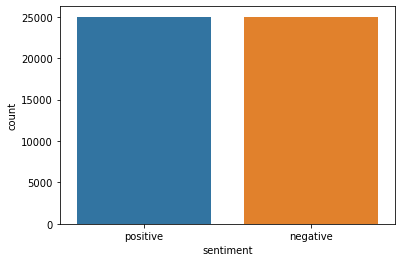

In [8]:
sns.countplot(x='sentiment',data=df)

In [9]:
df['sentiment'].describe()

count        50000
unique           2
top       positive
freq         25000
Name: sentiment, dtype: object

### Text Cleaning

In [10]:
def clean_text(text):
  # split into tokens by white space
  words = text.split()  
  tokens = [word.lower() for word in words]
  # prepare regex for char filtering
  re_punc = re.compile('[%s]' % re.escape(string.punctuation))
  # remove punctuation from each word
  tokens = [re_punc.sub('', w) for w in tokens]
  re_br = re.compile('(br)$')
  tokens = [re_br.sub('', w) for w in tokens]
  # remove remaining tokens that are not alphabetic
  tokens = [word for word in tokens if word.isalpha()]
  # filter out stop words
  stop_words = set(stopwords.words('english'))
  tokens = [word for word in tokens if not word in stop_words]
  # filter out short tokens
  tokens = [word for word in tokens if len(word) > 1]  
  return tokens


In [11]:
df['review'] = df['review'].apply(lambda x:clean_text(x))

In [12]:
df.head()

,review,sentiment
0,"[one, reviewers, mentioned, watching, oz, epis...",positive
1,"[wonderful, little, production, filming, techn...",positive
2,"[thought, wonderful, way, spend, time, hot, su...",positive
3,"[basically, theres, family, little, boy, jake,...",negative
4,"[petter, matteis, love, time, money, visually,...",positive


In [13]:
top = Counter([item for row in df['review'] for item in row])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,movie,85223
1,film,76028
2,one,51476
3,like,39063
4,good,28912
5,even,24582
6,would,24036
7,time,23960
8,really,23011
9,see,22640


In [14]:
bad_review = df[df['sentiment'] == 'negative']
good_review = df[df['sentiment'] == 'positive']

In [15]:
good_review

,review,sentiment
0,"[one, reviewers, mentioned, watching, oz, epis...",positive
1,"[wonderful, little, production, filming, techn...",positive
2,"[thought, wonderful, way, spend, time, hot, su...",positive
4,"[petter, matteis, love, time, money, visually,...",positive
5,"[probably, alltime, favorite, movie, story, se...",positive
...,...,...
49983,"[loved, fan, original, series, always, wondere...",positive
49985,"[imaginary, heroes, clearly, best, film, year,...",positive
49989,"[got, one, weeks, ago, love, modern, light, fi...",positive
49992,"[john, garfield, plays, marine, blinded, grena...",positive


In [16]:
#MosT common words in good review
top = Counter([item for row in good_review['review'] for item in row])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,film,40163
1,movie,36704
2,one,26293
3,like,17181
4,good,14572
5,great,12810
6,story,12610
7,time,12123
8,see,11986
9,well,11406


In [17]:
#MosT common words in bad review
top = Counter([item for row in bad_review['review'] for item in row])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Reds')

,Common_words,count
0,movie,48519
1,film,35865
2,one,25183
3,like,21882
4,even,15098
5,bad,14362
6,good,14340
7,would,13653
8,really,12293
9,time,11837


## Feature Extraction

In [18]:
def vectorize(train_text, test_text, isTfIdf=False, isBinary=False, ngram_min=1, ngram_max=1):
  # create the transform
  if (isTfIdf == False):
    vectorizer = CountVectorizer(binary=isBinary,  ngram_range=(ngram_min,ngram_max))
  else:
    vectorizer = TfidfVectorizer(ngram_range=(ngram_min,ngram_max))

  # tokenize and build vocab
  vectorizer.fit(train_text)

  # encode document
  training_features = vectorizer.transform(train_text)
  test_features = vectorizer.transform(test_text)
  return training_features, test_features

## Model Building

In [19]:
# Split the data into training and testing data - 90% train and 10% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(df['review'], df['sentiment'], test_size = 0.1, random_state = 100)

In [20]:
print(X_train.shape)
print(type(X_train))
print(X_test.shape)
print(type(X_test))

print(y_train.shape)
print(type(y_train))
print(y_test.shape)
print(type(y_test))

(45000,)
<class 'pandas.core.series.Series'>
(5000,)
<class 'pandas.core.series.Series'>
(45000,)
<class 'pandas.core.series.Series'>
(5000,)
<class 'pandas.core.series.Series'>


In [21]:
X_train

23756    [cant, really, remember, details, movie, excep...
39754    [pleasantly, surprised, find, enjoyable, film,...
32064    [brilliant, acting, excellent, plot, wonderful...
17972    [went, along, movie, trepidation, original, ma...
6130     [overall, film, ok, think, better, sepet, much...
                               ...                        
16304    [although, technically, advanced, film, seen, ...
79       [film, took, surprise, make, habit, finding, l...
12119    [im, sorry, even, tj, hookers, adrian, zmed, c...
14147    [movie, considered, academy, award, enjoy, mov...
38408    [talk, radio, sees, man, somewhat, accidentall...
Name: review, Length: 45000, dtype: object

In [22]:
X_train = X_train.map(' '.join)
X_test = X_test.map(' '.join)

In [23]:
X_test

4253     documentary homeless women interesting sense f...
30076    well done whole movie grudge going around kill...
48047    strange fate people looking discount bin dvd r...
1666     goes especially lawyers cops puerto ricowhich ...
30740    first explanation despite headline im giving f...
                               ...                        
9701     im usually inclined write reviews films dont t...
1304     one best movies one favorites movie good actin...
49735    star rating unmissable good okay could go meal...
33756    one movies released type situation made think ...
31171    ex wife saw intrigued trailer film waited come...
Name: review, Length: 5000, dtype: object

In [24]:
model = LinearSVC(max_iter=50000)

## Implement Different Feature Engineering techniques

### 1. Count Vectorizer

In [25]:
training_features, test_features =  vectorize(train_text=X_train, test_text=X_test)
model.fit(training_features, y_train)
y_pred = model.predict(test_features)
acc = accuracy_score(y_test,y_pred)
print("Test Accuracy for Count Vectorizer", acc)

Test Accuracy for Count Vectorizer 0.8688


### 2. Count Vectorizer Binary = True

In [26]:
training_features, test_features =  vectorize(train_text=X_train, test_text=X_test,isBinary=True)
model.fit(training_features, y_train)
y_pred = model.predict(test_features)
acc = accuracy_score(y_test,y_pred)
print("Test Accuracy for Count Vectorizer Binary=True", acc)

Test Accuracy for Count Vectorizer Binary=True 0.8732


### 3. Count Vectorizer n_gram range(1,2)

In [27]:
training_features, test_features =  vectorize(train_text=X_train, test_text=X_test,ngram_min=1,ngram_max=2)
model.fit(training_features, y_train)
y_pred = model.predict(test_features)
acc = accuracy_score(y_test,y_pred)
print("Test Accuracy for Count Vectorizer n-gram range (1,2)", acc)

Test Accuracy for Count Vectorizer n-gram range (1,2) 0.9026


### 4. Count Vectorizer n_gram range(1,3)

In [28]:
training_features, test_features =  vectorize(train_text=X_train, test_text=X_test,ngram_min=1,ngram_max=3)
model.fit(training_features, y_train)
y_pred = model.predict(test_features)
acc = accuracy_score(y_test,y_pred)
print("Test Accuracy for Count Vectorizer  n-gram range (1,3)", acc)

Test Accuracy for Count Vectorizer  n-gram range (1,3) 0.8992


### 5. Count Vectorizer n_gram range(2,3)

In [29]:
training_features, test_features =  vectorize(train_text=X_train, test_text=X_test,ngram_min=2,ngram_max=3)
model.fit(training_features, y_train)
y_pred = model.predict(test_features)
acc = accuracy_score(y_test,y_pred)
print("Test Accuracy for Count Vectorizer  n-gram range (2,3)", acc)

Test Accuracy for Count Vectorizer  n-gram range (2,3) 0.862


### 6. Tf-Idf Vectorizer

In [30]:
training_features, test_features =  vectorize(train_text=X_train, test_text=X_test,isTfIdf=True)
model.fit(training_features, y_train)
y_pred = model.predict(test_features)
acc = accuracy_score(y_test,y_pred)
print("Test Accuracy for Tf-Idf Vectorizer)", acc)

Test Accuracy for Tf-Idf Vectorizer) 0.899


### 7. Tf-Idf Vectorizer n_gram range(1,2)

In [31]:
training_features, test_features =  vectorize(train_text=X_train, test_text=X_test,isTfIdf=True, ngram_min=1,ngram_max=2)
model.fit(training_features, y_train)
y_pred = model.predict(test_features)
acc = accuracy_score(y_test,y_pred)
print("Test Accuracy for Tf-Idf Vectorizer  n-gram range (1,2)", acc)

Test Accuracy for Tf-Idf Vectorizer  n-gram range (1,2) 0.911


### 8. Tf-Idf Vectorizer n_gram range(1,3)

In [32]:
training_features, test_features =  vectorize(train_text=X_train, test_text=X_test,isTfIdf=True, ngram_min=1,ngram_max=3)
model.fit(training_features, y_train)
y_pred = model.predict(test_features)
acc = accuracy_score(y_test,y_pred)
print("Test Accuracy for Tf-Idf Vectorizer  n-gram range (1,3)", acc)

Test Accuracy for Tf-Idf Vectorizer  n-gram range (1,3) 0.9044


### 9. Tf-Idf Vectorizer n_gram range(2,3)

training_features, test_features =  vectorize(train_text=X_train, test_text=X_test,isTfIdf=True, ngram_min=2,ngram_max=3)
model.fit(training_features, y_train)
y_pred = model.predict(test_features)
acc = accuracy_score(y_test,y_pred)
print("Test Accuracy for Tf-Idf Vectorizer  n-gram range (2,3)", acc)

### 10. Word2Vec

In [33]:
from gensim.models import Word2Vec, KeyedVectors
from sklearn.decomposition import PCA
model_word2vec = KeyedVectors.load_word2vec_format("C:\\Users\\srivi\\Downloads\\GoogleNews-vectors-negative300.bin.gz", binary=True)

In [34]:
def transform(text):
    vector = np.zeros((300))
    for i in text.split():
        if i not in model_word2vec.key_to_index.keys():
            pass
        else:
            vector = vector + model_word2vec[i]
    return vector

In [35]:
training_features = X_train.apply(lambda x : transform(x))


In [36]:
training_features = np.array(training_features.values.tolist())

In [37]:
type(training_features)

numpy.ndarray

In [38]:
test_features = X_test.apply(lambda x : transform(x))
test_features = np.array(test_features.values.tolist())

In [39]:
test_features

array([[  1.93112183,   2.76042175,  -1.60507202, ...,  -1.15023804,
          2.44607544,   0.15664673],
       [  4.27078247,   2.1337204 ,   3.84022522, ...,  -6.5190506 ,
          1.6485672 ,  -4.11095428],
       [ 16.4914856 ,   9.68110657,   3.12596893, ..., -18.70817184,
          8.98594666,   1.48474884],
       ...,
       [  7.73562622,   6.08436584,  -1.22524643, ...,  -4.51039124,
          4.4916687 ,   1.74394989],
       [  3.85224915,   2.48638916,   1.05357361, ...,  -4.47038269,
          3.71443939,  -3.07047272],
       [  6.73110962,   6.09115601,   0.35498047, ...,  -4.61856461,
          7.79785156,   0.54196167]])

In [40]:
y_train

23756    negative
39754    positive
32064    negative
17972    negative
6130     positive
           ...   
16304    positive
79       positive
12119    negative
14147    positive
38408    positive
Name: sentiment, Length: 45000, dtype: object

In [ ]:
model.fit(training_features, y_train)
y_pred = model.predict(test_features)
acc = accuracy_score(y_test,y_pred)
print("Test Accuracy for word2vec", acc)

## Conclusion

Among the different feature extraction methods, Tf-Idf Vectorizer with n-gram range(1,2) performs best with the test accuracy of 91 %.